<a href="https://colab.research.google.com/github/jocelynandrade18/Repositorio2.-/blob/main/Clasificaci%C3%B3n_de_Ropa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLASIFICACIÓN DE ROPA**

In [20]:
import numpy as np  # Importa la librería NumPy para operaciones numéricas
import tensorflow as tf  # Importa TensorFlow, biblioteca para aprendizaje profundo
from tensorflow.keras.models import Sequential  # Importa modelo secuencial (red neuronal lineal)
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Softmax  # Importa capas para la red
from tensorflow.keras.optimizers import Adam  # Importa optimizador Adam
from tensorflow.keras.datasets import fashion_mnist  # Importa el dataset Fashion MNIST
from tensorflow.keras.losses import SparseCategoricalCrossentropy  # Importa la función de pérdida para clasificación
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Importa funciones para matriz de confusión
import seaborn as sns  # Importa Seaborn para visualizaciones
import matplotlib.pyplot as plt  # Importa Matplotlib para graficar

# **Fashion MNIST Dataset**

In [21]:
fashion_mnist = tf.keras.datasets.fashion_mnist # Guardar la base de datos

In [22]:
fashion_mnist.load_data #Tendremos imagenes de 28x28 de las prendas de vestir, con 10 categorías

<function keras.src.datasets.fashion_mnist.load_data()>

In [23]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # Tenemos las siguientes prendas en el conjunto de class

# **Preprocesamiento de datos**

In [24]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # Carga el dataset Fashion MNIST dividiéndolo en datos de entrenamiento y prueba

# **Visualización de una imagen**

In [25]:
index = 6000 # selecciona un indice

In [26]:
image = train_images[index] # Selecciona una etiqueta de la imagen
label = train_labels[index]  # Obtiene la etiqueta (clase) de la imagen en la posición indicada por 'index'

In [27]:
print(image) # Imprime la imagen con 28 columnas y filas, imagen cuadrada.

[[  0   0   0   0   0   0   3   0   0   0  48  73  96 110 115 110 115 107
   90  72  50  25   0   0   1   1   0   0]
 [  0   0   0   1   0   5   0  15 185 243 244 247 245 245 244 247 246 247
  250 251 246 247 227  42   0   1   0   0]
 [  0   0   0   0   4   0   4 220 105  56 114  73  81  99  76  38 136  68
   18  82  73  11 129 240   0   0   1   0]
 [  0   0   1   0   1   0 139 190   8 174  79  63  70 119  48 110  30  55
  139 147  50 135   0 227 108   0   0   0]
 [  0   0   1   0   0   0 203 213   2 113 173 102 111 182  63   6 143  45
   72 255  62   0  81 227 182   0   0   0]
 [  0   0   1   0   0   0 214 190 202  71  64 113 109 157  39 191 255  29
  174 198  74  40 113 234 182   0   0   0]
 [  0   0   0   1   0  26 204 174  20  49 177  45   0 172   0 221 227  18
   44  80  76 120   0 197 195   0   0   0]
 [  0   0   0   0  15 133 197 217 134 126 219 105 241 239 117 156 155 144
  147 168 141 182 255 214 197 138   0   0]
 [  0   0   0   5 178 235 194 206   0  40 122  48 170  14   0   

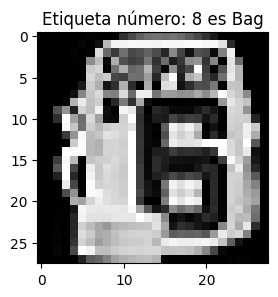

In [28]:
plt.figure(figsize=(3, 3))  # Crea una figura de tamaño 3x3 pulgadas para mostrar la imagen
plt.imshow(image, cmap=plt.cm.gray)  # Muestra la imagen en escala de grises
plt.title(f'Etiqueta número: {label} es {class_names[label]}')  # Coloca el título con el número y nombre de la clase
plt.show()  # Muestra la figura en pantalla

# **Preprocesamiento de datos**

In [29]:
print(train_images.shape) # 6000 conjuntos de datos con 28 filas y columnas
print(test_images.shape)  # 1000 conjuntos de datos con 28 filas y columnas

(60000, 28, 28)
(10000, 28, 28)


In [30]:
# Normalizar las imágenes para que los valores estén en el rango [0, 1]
train_images = train_images / 255.0 # Cada elemento se va a dividir entre 255 que son los valores de RGB, llamadas operaciones vectoriales
test_images = test_images / 255.0   # Cada elemento se va a dividir entre 255 que son los valores de RGB

In [31]:
np.array([0, 1, 3]) / 3  # Ejemplo con diferentes variables

array([0.        , 0.33333333, 1.        ])

# **Red neuronal convolucional**

In [32]:
# Crear el modelo de CNN
model = Sequential([ # Utilizar el modelo Sequential
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), #Convoluciones con filtro de 3x3
    MaxPooling2D((2, 2)), # 2x2
    Conv2D(64, (3, 3), activation='relu'), #64 convoluciones y activación de relu
    MaxPooling2D((2, 2)), # 2x2
    Conv2D(64, (3, 3), activation='relu'), # 64 convoluciones y activación de relu
    Flatten(),     #Capas ocultas de la 3 a 8
    Dense(64, activation='relu'), # 64 convoluciones y activación de relu
    Dense(10)  #Capa de salida
])

**Compilar el modelo**

In [33]:
# Tasa de aprendizaje deseada
learning_rate = 0.001  # Define la tasa de aprendizaje para el optimizador
adam_optimizer = Adam(learning_rate=learning_rate)  # Crea el optimizador Adam con la tasa de aprendizaje especificada

In [34]:
model.compile(optimizer=adam_optimizer,  # Crea el modelo de compilación y optimizador Adam con la tasa de aprendizaje especificada
              loss=SparseCategoricalCrossentropy(from_logits=True), # Funcion de perdida catagorica
              metrics=['accuracy']) # Metrica de precisión para ver si sirve o no

**Entrenar el modelo**

In [37]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels)) # Entrenamos, epocas 10, conjunto con el que se hara la validación test

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9539 - loss: 0.1223 - val_accuracy: 0.9126 - val_loss: 0.2869
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9549 - loss: 0.1192 - val_accuracy: 0.9083 - val_loss: 0.2990
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9592 - loss: 0.1059 - val_accuracy: 0.9120 - val_loss: 0.3009
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9625 - loss: 0.0968 - val_accuracy: 0.9156 - val_loss: 0.3109
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9664 - loss: 0.0894 - val_accuracy: 0.9037 - val_loss: 0.3412
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9673 - loss: 0.0869 - val_accuracy: 0.9113 - val_loss: 0.3469
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9713 - loss: 0.0759 - val_accuracy: 0.9139 - val_loss: 0.3545
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9722 -

**Graficar la función de pérdida**

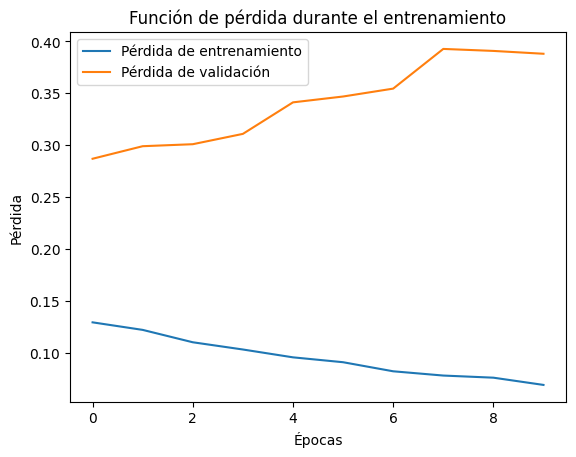

In [38]:
import matplotlib.pyplot as plt  # Importa Matplotlib para crear gráficos

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')  # Grafica la pérdida en entrenamiento por época
plt.plot(history.history['val_loss'], label='Pérdida de validación')  # Grafica la pérdida en validación por época
plt.xlabel('Épocas')  # Etiqueta del eje X (número de épocas)
plt.ylabel('Pérdida')  # Etiqueta del eje Y (valor de la pérdida)
plt.legend()  # Muestra la leyenda para distinguir las curvas
plt.title('Función de pérdida durante el entrenamiento')  # Título del gráfico
plt.show()  # Muestra el gráfico